## Hough Detections

### Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

### Read in and convert the image to grayscale

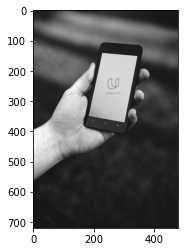

In [15]:
image = cv2.imread('D:\ComputerVision\images\phone.jpg')
image_copy = np.copy(image)

#change color from BGR to Gray
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(image_copy, cmap='gray')


### Edge detection with Canny edge detector

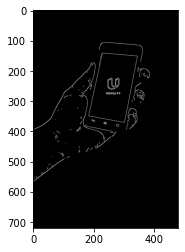

In [26]:
#define the low- and highthreshold for canny detector
low_threshold = 80
high_threshold = 100

#applt the canny detector
edges = cv2.Canny(image_copy, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

### Hough transform

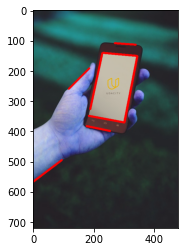

In [32]:
#define the hough transform parameters

#rho and theta: resolution of our detection. Hier: rho = 1 pixel, theta = 1 degree
rho = 1
theta = np.pi/180

#minimum threshold to detect the line. It's the minium number of hub-space intersection it takes to find the line
threshold = 60

# the minimum length of line
min_line_length = 60

#the maximum gap between the lines
max_line_gap = 5

#creating an image copy to draw lines on
line_image = np.copy(image) 

#run Hough on the edge-detected image
#this function will return all the detected hough lines
#each line is an array of four points: (x1, y1), (x2, y2). These are just 2 endpoints of each line
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:

        #(255,0,0) is the color of the line
        #5 is the size of the line
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)